In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
d

,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Unnamed: 7
Data Medicao,,,,,,,,
2001-11-30,2001-11-30,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,2001-12-31,9.0,66.4,973.611448,21.022154,6.5,2.592812,NaN
2002-01-31,2002-01-31,9.0,88.8,973.079850,22.962743,8.1,2.582557,NaN
2002-02-28,2002-02-28,8.0,228.8,973.307128,22.510687,6.5,2.667737,NaN
2002-03-31,2002-03-31,21.0,368.8,973.534407,22.920735,8.3,2.752916,NaN
...,...,...,...,...,...,...,...,...
2019-09-30,2019-09-30,7.0,78.0,994.596806,14.234028,11.3,2.788889,NaN
2019-10-31,2019-10-31,18.0,351.8,991.689080,18.127299,11.3,3.423851,NaN
2019-11-30,2019-11-30,10.0,139.4,990.006389,21.057500,12.1,2.897778,NaN


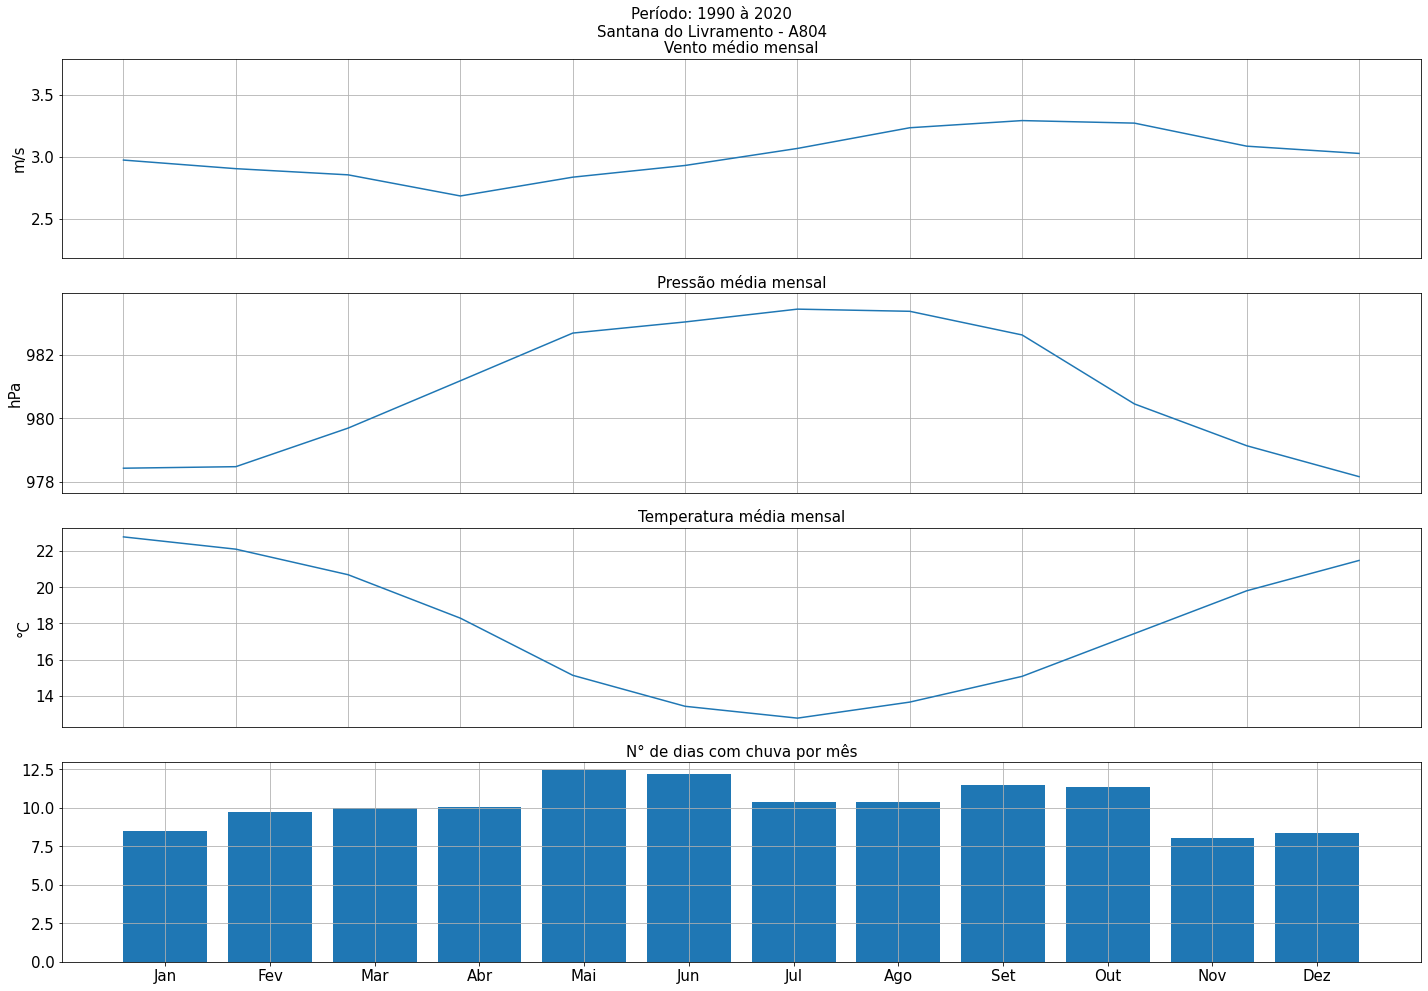

In [46]:
path = "/media/lucasdmarten/HD/DADOS_TCC/dados_estacao/historicos/dados_A804_M_2001-11-21_2020-01-01.csv"
d = pd.read_csv(path,skiprows=9,delimiter=';').interpolate()
d.index = pd.to_datetime(d["Data Medicao"])
df = d.groupby(d.index.month).mean()
df.index = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
ndays_precip=df["NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(número)"].tolist()
mean_pressure_month=df["PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)"].tolist()
mean_wind_month=df["VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)"].tolist()
mean_temperature_month=df["TEMPERATURA MEDIA, MENSAL (AUT)(°C)"].tolist()
fig, axs = plt.subplots(4,figsize =(20, 14))

plt.suptitle("Período: 1990 à 2020\nSantana do Livramento - A804",  fontsize=15)

# Creating plot
axs[0].plot(df.index,mean_wind_month)
axs[0].set_title("Vento médio mensal",fontsize=15)
axs[0].set_ylim(np.min(mean_wind_month)-0.5,np.max(mean_wind_month).max()+0.5)
axs[0].set_ylabel('m/s',fontsize=15)
axs[0].grid(True)
axs[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=15)

axs[1].plot(df.index,mean_pressure_month)
axs[1].set_title("Pressão média mensal",fontsize=15)
axs[1].set_ylim(np.min(mean_pressure_month)-0.5,np.max(mean_pressure_month)+0.5)
axs[1].set_ylabel('hPa',fontsize=15)
axs[1].grid(True)
axs[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=15)

axs[2].plot(df.index,mean_temperature_month)
axs[2].set_title("Temperatura média mensal",fontsize=15)
axs[2].set_ylim(np.min(mean_temperature_month)-0.5,np.max(mean_temperature_month)+0.5)
axs[2].set_ylabel('°C',fontsize=15)
axs[2].grid(True)
axs[2].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=15)

axs[3].bar(height=ndays_precip,x=df.index)
axs[3].set_title("N° de dias com chuva por mês",fontsize=15)
axs[3].set_ylim(0,np.max(ndays_precip)+0.5)
axs[3].grid(True)
axs[3].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelsize=15)

plt.savefig('month_mean_A804.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.tight_layout()
plt.show()